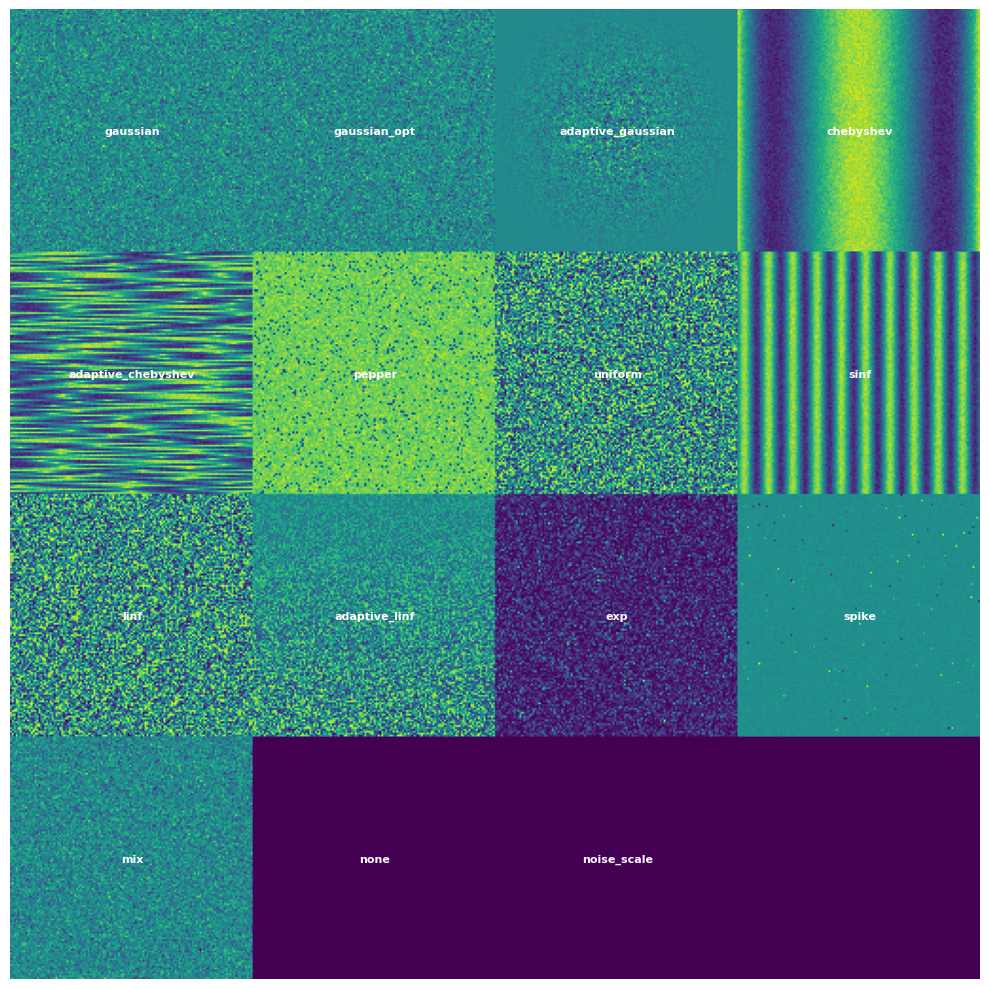

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# -------- noise definitions (同前) --------
N = 128
rng = np.random.default_rng()

def gaussian():                       return rng.normal(0, 1, (N, N))
def gaussian_opt(mu=0.3, sigma=0.7):  return rng.normal(mu, sigma, (N, N))
def adaptive_gaussian():
    xv, yv = np.meshgrid(np.linspace(-1, 1, N), np.linspace(-1, 1, N))
    freq = np.sqrt(xv**2 + yv**2)
    sigma_map = 0.1 + 0.9 * (1 - freq)
    sigma_map = np.clip(sigma_map, 1e-6, None)
    return rng.normal(0, sigma_map)
def chebyshev(deg=4):
    x = np.linspace(-1, 1, N)
    T = np.polynomial.Chebyshev([0]*deg + [1])
    base = T(x)
    return np.tile(base, (N, 1)) + rng.normal(0, 0.1, (N, N))
def adaptive_chebyshev():
    base = chebyshev()
    shifts = rng.integers(0, N, size=N)
    return np.array([np.roll(base[i], shifts[i]) for i in range(N)])
def pepper(density=0.05):
    img = np.zeros((N, N))
    mask = rng.random((N, N)) < density
    img[mask] = -1.0
    return img + rng.normal(0, 0.1, (N, N))
def uniform():                       return rng.uniform(-1, 1, (N, N))
def sinf(freq=10):
    xv = np.arange(N)
    return np.sin(2*np.pi*freq*xv/N)[None, :] + rng.normal(0, 0.1, (N, N))
def linf(eps=0.1):                  return rng.uniform(-eps, eps, (N, N))
def adaptive_linf():
    eps_map = np.linspace(0.05, 0.2, N)
    return np.array([rng.uniform(-eps, eps, N) for eps in eps_map])
def exp(scale=1.):                  return (rng.exponential(scale, (N, N)) - scale/2) / scale
def spike(density=0.01, amp=5):
    img = np.zeros((N, N))
    mask = rng.random((N, N)) < density
    img[mask] = amp * (rng.random(np.count_nonzero(mask)) - 0.5)
    return img + rng.normal(0, 0.1, (N, N))
def mix():                          return 0.5*gaussian() + 0.5*uniform()
def none():                         return np.zeros((N, N))
def noise_scale(scale=0.2):         return np.full((N, N), scale)

generators = {
    "gaussian": gaussian,
    "gaussian_opt": gaussian_opt,
    "adaptive_gaussian": adaptive_gaussian,
    "chebyshev": chebyshev,
    "adaptive_chebyshev": adaptive_chebyshev,
    "pepper": pepper,
    "uniform": uniform,
    "sinf": sinf,
    "linf": linf,
    "adaptive_linf": adaptive_linf,
    "exp": exp,
    "spike": spike,
    "mix": mix,
    "none": none,
    "noise_scale": noise_scale,
}

# -------- create mosaic (4x4 grid, last cell留空) --------
rows, cols = 4, 4
cell_h, cell_w = N, N
mosaic = np.zeros((rows*cell_h, cols*cell_w), dtype=float)

names = list(generators.keys())
for idx, name in enumerate(names):
    r, c = divmod(idx, cols)
    noise = generators[name]()
    # normalize each cell for better contrast
    norm = (noise - noise.min()) / (noise.max() - noise.min() + 1e-9)
    mosaic[r*cell_h:(r+1)*cell_h, c*cell_w:(c+1)*cell_w] = norm

# -------- plot single figure --------
plt.figure(figsize=(10, 10))
plt.imshow(mosaic, aspect='equal')
plt.axis('off')

# 標注名稱
for idx, name in enumerate(names):
    r, c = divmod(idx, cols)
    y = r*cell_h + cell_h/2
    x = c*cell_w + cell_w/2
    plt.text(x, y, name, ha='center', va='center',
             fontsize=8, color='white', weight='bold')

plt.tight_layout()
plt.show()
